<center><h1> Data Camp Project</h1> </center>
<center><h1>Bicycle surplus prediction</h1></center>
<center> <h4>Authors : Ghassen Ben Hassine, Firas Rhimi, Etienne Lenaour, Ryme Kabak, Elyes Karray, Mehdi Bennaceur</h4></center>


<div style="text-align: center;">

<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<center>
<img border="0" src="https://miro.medium.com/max/4096/1*GJ45uUnc49T-D5LdYn7CfQ.jpeg" width="100%"> </td>
</center>

  </tr>
</table> 
</div>



## Table of Contents

0. [Introduction](#Introduction)
1. [Business Motivation](#Business-Motivation)
2. [Data Construction](#Data)
3. [Evaluation metric](#Evaluation-metric)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Feature Engineering](#Feature-Engineering)
6. [Predictions](#Predictions)

# Introduction

New York Bike Sharing system provides a carbon-free way of transportation to more than 50 millions person each month. More than 800 hundreds bike docking stations are available across the city and are open 24/7. It was in part conceived to decrease traffic and usage in other public transport services (subway etc...).


There are two main dataset we will use:

* `bike_data.csv` - bike usage in NYC.
* `weather_data.csv` -  weather data in NYC.

The goal here will be to come up with an algorithm that tells us when and where CitiBike should recharge/discharge a docking station.

# Business Motivation 


# Data  


As stated before, we will be working with two datasets : 
## bike_data.csv
This dataset was built from an extract of https://www.citibikenyc.com/system-data. It includes historical data of bike trips in NYC between 2016 and 2018 : 
* `Trip Duration` - the duration of the trip in seconds
* `Start Time` -Start Date and Time 
* `Stop Time` - Stop Date and Time 
* `Start Station ID` 
* `Start Station Name`
* `Start Station Longitude` - Spatial Coordinates
* `Start Station Latitude` - Spatial Coordinates
* `End Station ID` 
* `End Station Name`
* `End Station Longitude` - Spatial Coordinates
* `End Station Latitude` - Spatial Coordinates
* `Bike ID` 
* `User Type` - Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member
* `Birth Year` - Birth Year of the customer
* `Gender` - Gender of the customer : Zero=unknown; 1=male; 2=female

In [82]:
from get_data import *
raw_data= get_bike_data()
raw_data.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,362,2016-01-01 00:02:52,2016-01-01 00:08:54,3186,Grove St PATH,40.719586,-74.043117,3209,Brunswick St,40.724176,-74.050656,24647,Subscriber,1964.0,2
1,200,2016-01-01 00:18:22,2016-01-01 00:21:42,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,24605,Subscriber,1962.0,1
2,202,2016-01-01 00:18:25,2016-01-01 00:21:47,3186,Grove St PATH,40.719586,-74.043117,3213,Van Vorst Park,40.718489,-74.047727,24689,Subscriber,1962.0,2
3,248,2016-01-01 00:23:13,2016-01-01 00:27:21,3209,Brunswick St,40.724176,-74.050656,3203,Hamilton Park,40.727596,-74.044247,24693,Subscriber,1984.0,1
4,903,2016-01-01 01:03:20,2016-01-01 01:18:24,3195,Sip Ave,40.730743,-74.063784,3210,Pershing Field,40.742677,-74.051789,24573,Customer,NaN,0


From this raw dataset, we construct a new dataset that will be used in the challenge as a training set. This new dataset will include : 
* `Year` 
* `Month` 
* `Day` 
* `Hour` 
* `Station ID` 
* `Station Name`
* `Longitude` 
* `Latitude` 
* `Surplus` : The target we want to predict : the difference between the number of bikes that come in a given station and the number of bikes that leave this station in a given date.

The preprocessing to get the train set is done in the get_data.py file. 


In [3]:
train_data = get_flow_data(raw_data)
train_data.head()

,Year,Month,Day,Hour,Station ID,Station Name,Longitude,Latitude,Surplus
0,2016.0,1.0,1.0,0.0,3203.0,Hamilton Park,-74.044247,40.727596,1.0
1,2016.0,1.0,1.0,0.0,3209.0,Brunswick St,-74.050656,40.724176,0.0
2,2016.0,1.0,1.0,0.0,3213.0,Van Vorst Park,-74.047727,40.718489,2.0
3,2016.0,1.0,1.0,1.0,3187.0,Warren St,-74.038051,40.721124,-1.0
4,2016.0,1.0,1.0,1.0,3203.0,Hamilton Park,-74.044247,40.727596,2.0


## Weather_data.csv


In [128]:
Weather = pd.read_csv('Data\Weather Data\Train_Weather.csv')
Weather.head()

,Hour,Temperature,Apparent Temperature,Wind,Relative Humidity,Date
0,00:51,6°C,4°C,Variable à 7 Km/h,49%,2016-01-01
1,01:51,5°C,4°C,Variable à 6 Km/h,53%,2016-01-01
2,02:51,5°C,3°C,280°7 Km/h,57%,2016-01-01
3,03:51,5°C,2°C,280°15 Km/h,57%,2016-01-01
4,04:51,4°C,0°C,270°17 Km/h,61%,2016-01-01


# Evaluation metric

# Exploratory Data Analysis

In [35]:
# Imports 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [25]:
X_df, y_df = train_data.drop(columns= ['Surplus']) ,train_data['Surplus']

In [40]:
train_data.count()

Year            511903
Month           511903
Day             511903
Hour            511903
Station ID      511903
Station Name    511903
Longitude       511903
Latitude        511903
Surplus         511903
dtype: int64

In [39]:
train_data.describe(include='all')

,Year,Month,Day,Hour,Station ID,Station Name,Longitude,Latitude,Surplus
count,511903.000000,511903.000000,511903.000000,511903.000000,511903.000000,511903,511903.000000,511903.000000,511903.000000
unique,NaN,NaN,NaN,NaN,NaN,199,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Grove St PATH,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,20557,NaN,NaN,NaN
mean,2017.111619,6.963298,15.755520,13.518585,3244.058263,NaN,-73.988233,40.690377,0.000000
std,0.822150,3.229329,8.795291,5.687800,132.903913,NaN,2.117686,1.164652,3.682759
min,2016.000000,1.000000,1.000000,0.000000,127.000000,NaN,-74.096937,0.000000,-54.000000
25%,2016.000000,4.000000,8.000000,9.000000,3194.000000,NaN,-74.055701,40.717732,-1.000000
50%,2017.000000,7.000000,16.000000,14.000000,3209.000000,NaN,-74.046305,40.721651,0.000000
75%,2018.000000,10.000000,23.000000,18.000000,3269.000000,NaN,-74.038914,40.727596,1.000000


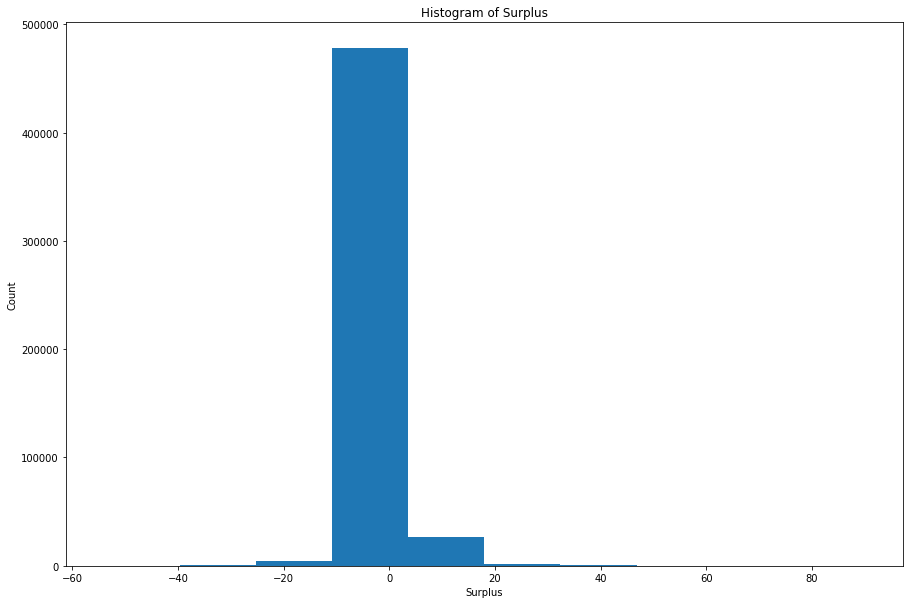

In [98]:
# Histogram
plt.figure(figsize=(15,10))
plt.hist(y_df)
plt.title('Histogram of Surplus')
plt.xlabel('Surplus')
plt.ylabel('Count')
plt.show()


In [85]:
# Mean Surplus for a given station
df= train_data[['Surplus','Station ID']].groupby('Station ID').mean()
df.head()


,Surplus
Station ID,
127.0,1.0
128.0,1.0
146.0,1.0
147.0,1.0
152.0,1.0


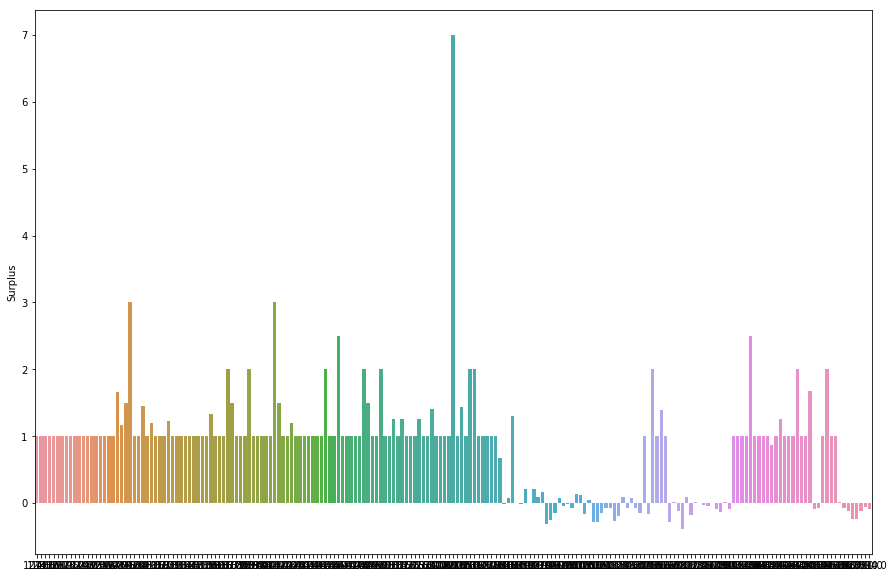

In [86]:
plt.figure(figsize=(15,10))
stations = list(df.index)
mean_surplus = df['Surplus']
sns.barplot(stations,mean_surplus)

In [88]:
df[df['Surplus']==7]

,Surplus
Station ID,
2021.0,7.0


In [91]:
train_data[train_data['Station ID']==2021] # We have the information for just 1 hour for this station 

,Year,Month,Day,Hour,Station ID,Station Name,Longitude,Latitude,Surplus
106179,2017.0,1.0,25.0,17.0,2021.0,W 45 St & 8 Ave,-73.988597,40.759291,7.0


In [102]:
# Mean Surplus for a given Hour 
df=train_data[['Surplus','Hour']].groupby('Hour').mean()
df.head()

,Surplus
Hour,
0.0,0.046175
1.0,0.062973
2.0,0.053318
3.0,0.026421
4.0,-0.007485


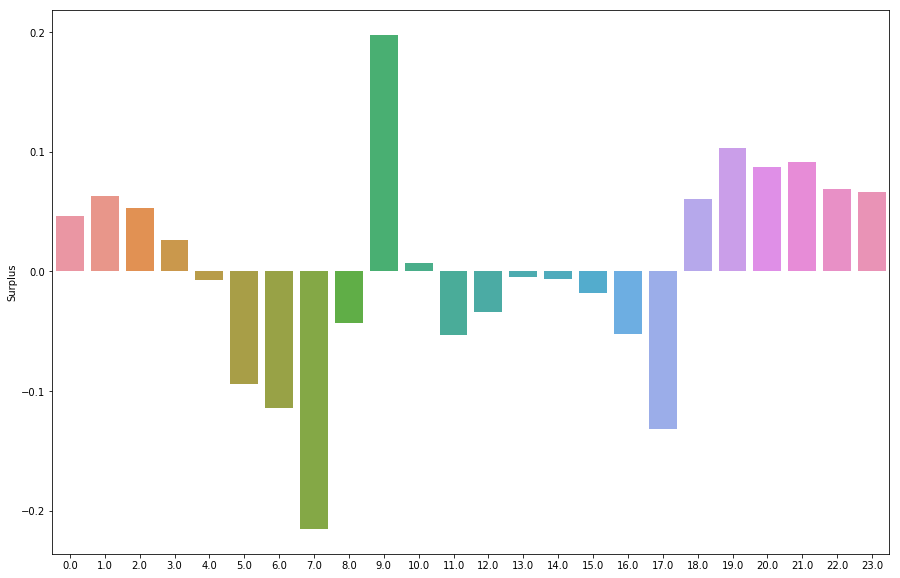

In [103]:
plt.figure(figsize=(15,10))
hour = list(df.index)
mean_surplus = df['Surplus']
sns.barplot(hour,mean_surplus)

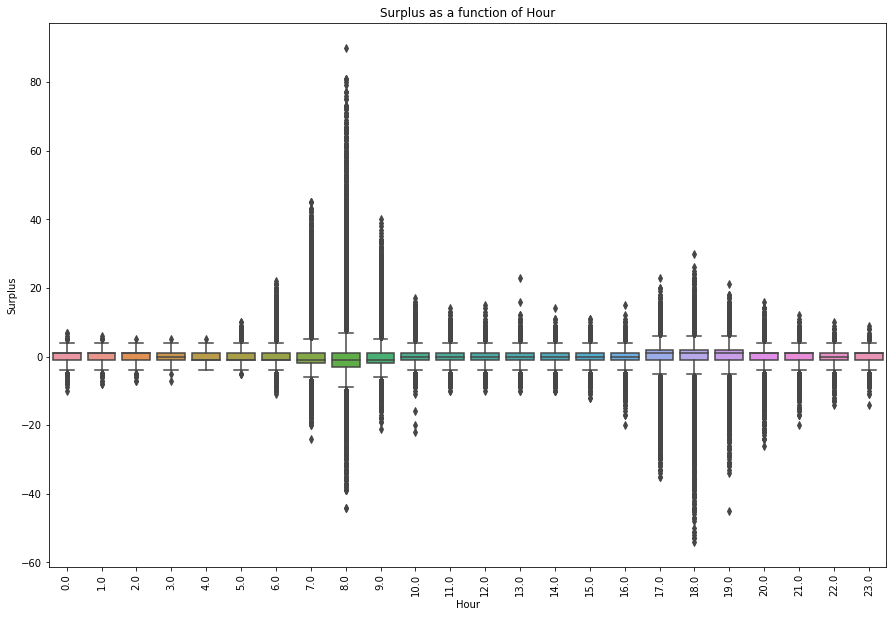

In [104]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Hour'], train_data['Surplus'])
plt.xticks(rotation='vertical', )
plt.title('Surplus as a function of Hour')
plt.show()


## Weather Data

# Feature Engineering

## Day of week 

In [113]:
ts = pd.to_datetime(X_df[['Year','Month','Day']])
X_df['Weekdday']=ts.dt.weekday
X_df.head()

,Year,Month,Day,Hour,Station ID,Station Name,Longitude,Latitude,Weekdday
0,2016.0,1.0,1.0,0.0,3203.0,Hamilton Park,-74.044247,40.727596,4
1,2016.0,1.0,1.0,0.0,3209.0,Brunswick St,-74.050656,40.724176,4
2,2016.0,1.0,1.0,0.0,3213.0,Van Vorst Park,-74.047727,40.718489,4
3,2016.0,1.0,1.0,1.0,3187.0,Warren St,-74.038051,40.721124,4
4,2016.0,1.0,1.0,1.0,3203.0,Hamilton Park,-74.044247,40.727596,4


In [114]:
## Groupby day of the week
train_data['Weekday'] = ts.dt.weekday 
df=train_data[['Surplus','Weekday']].groupby('Weekday').mean()
df.head()

,Surplus
Weekday,
0,0.001376
1,0.000160
2,0.000143
3,-0.000672
4,-0.001446


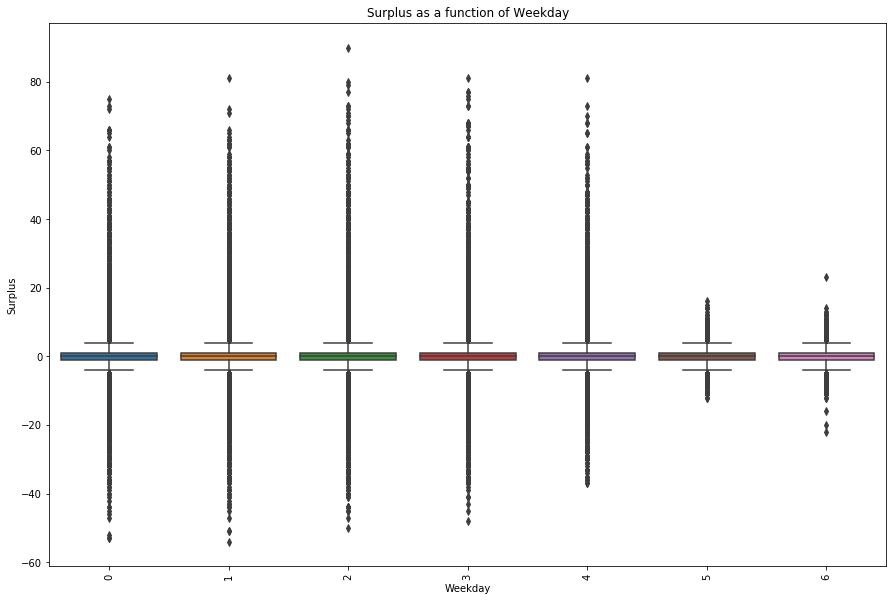

In [116]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Weekday'], train_data['Surplus'])
plt.xticks(rotation='vertical', )
plt.title('Surplus as a function of Weekday')
plt.show()


## Holiday

Federal and State Holidays:
- New Year: 1 January.
- Martin Luther King Jr. Day: Third Monday of January. In honour of Martin Luther King Jr who fought to defend racial equality.
- President’s Day: Third Monday of February. Celebrated in honour of George Washington and all of United States’ Presidents.
- Memorial Day: Last Monday of May. To remember the soldiers who died while serving in the country’s armed forces.
- Independence Day: 4 July. On the 4 July, 1776, 13 colonies became independent from British domination and formed the first States of the country.
- Labor day: First Monday of September
- Columbus Day: Second Monday of October. Remembers Christopher Columbus’ arrival to the Americas on 12 October, 1492.
- Veterans Day: 11 November. The anniversary of the signing of the armistice.
- Thanksgiving Day: Last Thursday of November.
- Christmas: 25 December.


In [159]:
## add is_Holiday : 1 if holiday, else 0 
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal=calendar()
holidays = cal.holidays(start=ts.min(), end=ts.max()) # Holidays in the US
holidays

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25',
               '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
               '2018-11-22', '2018-12-25', '2019-01-01'],
              dtype='datetime64[ns]', freq=None)

In [182]:
X_df['Is_Holiday'] = ts.apply(lambda x: int(x in holidays))
X_df.head()

,Year,Month,Day,Hour,Station ID,Station Name,Longitude,Latitude,Weekdday,Is_Holiday
0,2016.0,1.0,1.0,0.0,3203.0,Hamilton Park,-74.044247,40.727596,4,1
1,2016.0,1.0,1.0,0.0,3209.0,Brunswick St,-74.050656,40.724176,4,1
2,2016.0,1.0,1.0,0.0,3213.0,Van Vorst Park,-74.047727,40.718489,4,1
3,2016.0,1.0,1.0,1.0,3187.0,Warren St,-74.038051,40.721124,4,1
4,2016.0,1.0,1.0,1.0,3203.0,Hamilton Park,-74.044247,40.727596,4,1


In [185]:
##Groupby is_holiday
train_data['Is_Holiday'] = ts.apply(lambda x: int(x in holidays))
df=train_data[['Surplus','Is_Holiday']].groupby('Is_Holiday').mean()
df

,Surplus
Is_Holiday,
0,0.000032
1,-0.001351


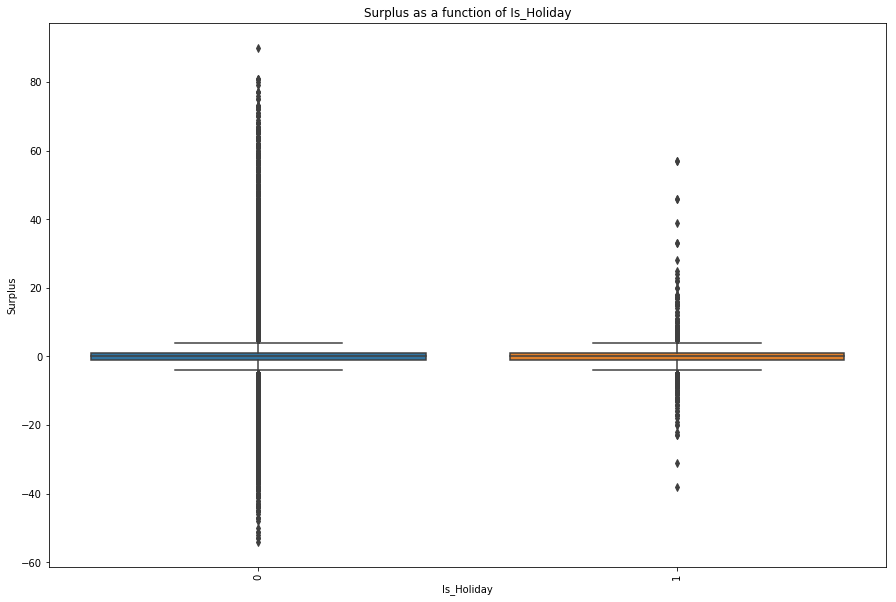

In [186]:
plt.figure(figsize=(15,10))
sns.boxplot(train_data['Is_Holiday'], train_data['Surplus'])
plt.xticks(rotation='vertical', )
plt.title('Surplus as a function of Is_Holiday')
plt.show()


# Predictions